# Sur crash course

This is a tutorial to dive in the key concepts of Sur and its usage under an interactive session. 


## Getting up

Sur has an [object-oriented design](https://en.wikipedia.org/wiki/Object-oriented_programming). This means that the library provides *classes* to interact with. The very first step is to import the classes and some helper functions we will need. 

In [1]:
from sur import Mixture, Compound, EosSetup, EosEnvelope, EosFlash, ExperimentalEnvelope, setup_database

We also need to create the database and load the built-in dataset of pure components constants. By default, Sur uses a database in memory, which is not persistence.

In [2]:
setup_database()

We are ready to start.

## Define a mixture

As you know, a mixture is two or more compound which have been combined such that each substance retains its own chemical identity. A ``Mixture`` in sur is the same: a combination of compounds, each one with its fraction (i.e, the sum of the fractions of all the compounds in the mixture must be 1)

In [3]:
mixture = Mixture()    

There are several ways to add compounds to a ``Mixture`` instance. For instance, you can use as if it would be a dictionary. 

In [4]:
mixture["co2"] = 0.5 
mixture["n-decane"] = 0.25
mixture["methane"] = 0.25

In order to facilitate the definition of interaction matrixes, we could sort each fraction by its molecular weight, no matter the order we added them.  

In [5]:
mixture.sort()

In [6]:
mixture

[(<Compound: METHANE>, Decimal('0.25')), (<Compound: CARBON DIOXIDE>, Decimal('0.5')), (<Compound: n-DECANE>, Decimal('0.25'))]

## Setup the EoS

To simulate the envelope, we need to choice and configurate an Equation of State. This is done via an `EosSetup` instance. For example, to use an RK-PR EoS with parameters $k_{ij}$ and $l_{ij}$ as constants, we create a setup object like this:

In [7]:
setup = EosSetup.objects.create(eos='RKPR', kij_mode=EosSetup.CONSTANTS, lij_mode=EosSetup.CONSTANTS)

By default, the interaction parameter between two compounds is 0.0 (however, Sur may provide a better choice when appropiated). To customize the calculation with our own parameters, we can override the default values. 

In [8]:
setup.set_interaction('kij', 'methane', 'co2', 0.1)
setup.set_interaction('kij', 'co2', 'n-decane',  0.091)

<KijInteractionParameter: RKPR [<Compound: CARBON DIOXIDE>, <Compound: n-DECANE>]: 0.091>

A setup object is independent of a mixture. It just define the equation to be used and the *bag of parameters* to tune it when we simulate an envelope for a particular mixture, but to have interaction between compounds that don't belong to a mixture is perfectly valid.

After set the interaction parameter, we probably want to see how the interaction matrix looks like for our particular compounds

In [9]:
setup.kij(mixture)

array([[ 0.   ,  0.1  ,  0.   ],
       [ 0.1  ,  0.   ,  0.091],
       [ 0.   ,  0.091,  0.   ]])

By the way, it'd be also possible to define the whole matrix for a particular mixture at once, using the method `setup.set_interaction_matrix()`

## Simulate the envelope

Having the mixture and the setup, we are able to obtain a the simulated envelope. 

In [10]:
envelope = mixture.get_envelope(setup)

In this case, `envelope` is an instance of `EosEnvelope`, i.e. an envelope that have been created via an equation of state. 


Any kind of envelope has many attributes ready to be inspected. For instance, we have the array of pressure and temperature

In [11]:
envelope.p

array([  1.44200000e-02,   1.64600000e-02,   2.01600000e-02,
         2.45700000e-02,   2.97800000e-02,   3.59200000e-02,
         4.31100000e-02,   5.14700000e-02,   6.11500000e-02,
         7.22700000e-02,   8.49900000e-02,   9.94400000e-02,
         1.15800000e-01,   1.34100000e-01,   1.54500000e-01,
         1.77100000e-01,   2.02000000e-01,   2.29200000e-01,
         2.58800000e-01,   2.90700000e-01,   3.24900000e-01,
         4.05600000e-01,   5.23400000e-01,   6.71100000e-01,
         8.54900000e-01,   1.08200000e+00,   1.36100000e+00,
         1.70100000e+00,   2.11100000e+00,   2.60400000e+00,
         3.19200000e+00,   3.88700000e+00,   4.70400000e+00,
         5.65700000e+00,   6.75900000e+00,   8.02800000e+00,
         9.47500000e+00,   1.11200000e+01,   1.29700000e+01,
         1.50400000e+01,   1.73400000e+01,   1.98900000e+01,
         2.26900000e+01,   2.57500000e+01,   2.90700000e+01,
         3.26600000e+01,   3.65200000e+01,   4.06600000e+01,
         4.50600000e+01,

In [12]:
envelope.t

array([ 310.    ,  312.0833,  315.3334,  318.5817,  321.8256,  325.0618,
        328.287 ,  331.4979,  334.6908,  337.8618,  341.0071,  344.1223,
        347.2033,  350.2456,  353.2444,  356.1952,  359.0929,  361.9326,
        364.7092,  367.4176,  370.0526,  375.4492,  381.889 ,  388.4249,
        395.0497,  401.7551,  408.5312,  415.3667,  422.2482,  429.1612,
        436.0893,  443.0145,  449.9174,  456.7773,  463.5724,  470.2797,
        476.8758,  483.3365,  489.6373,  495.7541,  501.6625,  507.3389,
        512.7602,  517.904 ,  522.749 ,  527.2748,  531.462 ,  535.2922,
        538.7482,  541.8137,  544.4731,  546.7121,  548.5169,  549.8788,
        550.8162,  551.236 ,  551.015 ,  549.9858,  547.9151,  544.911 ,
        541.2341,  536.9976,  532.2864,  527.1669,  524.4715,  515.914 ,
        509.8688,  503.5958,  497.1301,  490.5047,  483.751 ,  476.8995,
        469.9794,  463.0191,  456.0457,  449.0857,  445.4863,  441.9006,
        438.332 ,  434.7837,  431.2588,  424.291 , 

There is also equivalent arrays for critical points, if any. In our example there is just one point.

In [13]:
envelope.t_cri, envelope.p_cri

(array([ 520.3626]), array([ 159.1]))

## Plotting

In addition, an envelope object is able to generate a predefined Matplotlib figure. Before run it, if you are using Sur through Jupyter, may be handy to use the *magic command* to embed matplotlib figures directly in the document (instead of raise a popup window)  

In [14]:
%matplotlib inline

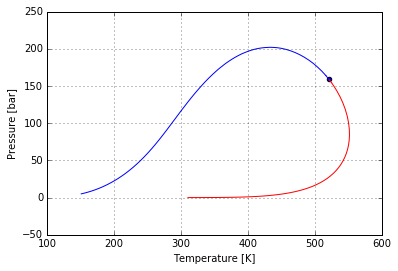

In [15]:
fig = envelope.plot()

As we saved the figure object (`fig`), we can use the [matplotlib API](http://matplotlib.org/1.5.1/contents.html) to manipulate it (changing aspect, size, span, colors..., in fact, anything we want), export, etc.   

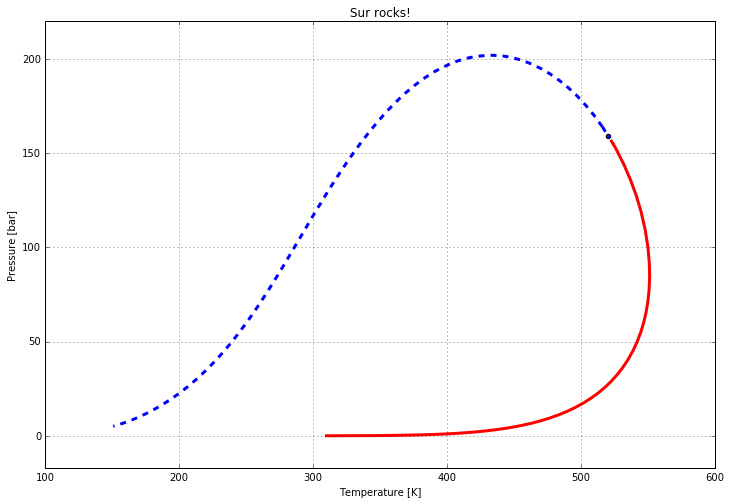

In [16]:
from matplotlib import pyplot as plt 

ax = fig.get_axes()[0]
ax.set_yticks([0] + ax.get_yticks()[1:])
ax.set_ylim((-50/3, 220))
ax.set_title('Sur rocks!')
plt.setp(ax.lines, linewidth=3)
plt.setp(ax.lines[1:], linestyle='--')
fig.set_size_inches(fig.get_size_inches() * 2)
fig

However, if that is too much power to your goal, you can pass some format directives (as in pyplot's [`plot()`](http://matplotlib.org/users/pyplot_tutorial.html)) directly to the method's parameters. For example:

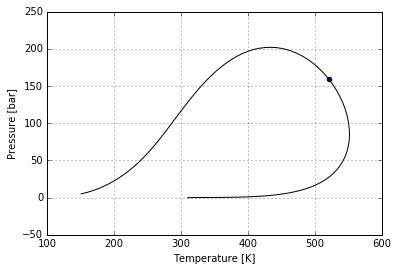

In [17]:
envelope.plot(format='k');

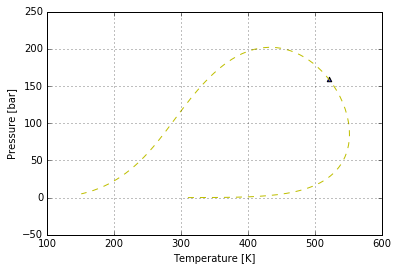

In [18]:
envelope.plot(critical_point='^', format='--y');

## Compare with experimental data

Constrant the simulation against a known experimental dataset for an evelope is possible. Here we'll mock this experimental data modifing the simulated one, but you should get it from a reliable source

In [19]:
import numpy as np
n = envelope.p.size

p_experimental = envelope.p[np.arange(0, n, 7)]  * 1.1
t_experimental = envelope.t[np.arange(0, n, 7)]
exp_envelope = mixture.experimental_envelope(t_experimental, p_experimental)

In this case, the `exp_envelope` object is an instance of `ExperimentalEnvelope`. In many way it works identically than an EosEnvelope (strictly, both are subclasses of the same base class), and they share attribute and methods. Of course, the key difference for an experimental envelope is that we don't need to calculate, we just set the arrays manually.


Another difference is that the default plot style is slightly different. 

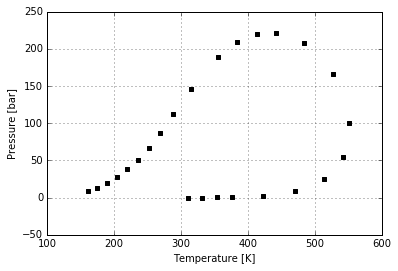

In [20]:
exp_fig = exp_envelope.plot()

By the way, many envelope's figures can be chained, passing a base one to the method `plot()` as the first parameter. For example, here we plot both the simulated and the experimental envelopes in the same figure

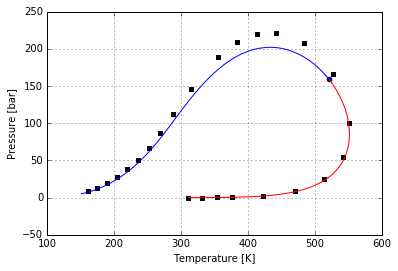

In [21]:
envelope.plot(exp_fig)

## Calculate a flash

A flash represents a separation of the mixture in two with the same compounds but different fractions. In Sur, we can get a flash instance through the method `get_flash()`

In [22]:
flash = mixture.get_flash(setup, t=400, p=100)

In [23]:
flash.vapour_mixture

[(<Compound: METHANE>, Decimal('0.360497')), (<Compound: CARBON DIOXIDE>, Decimal('0.625358')), (<Compound: n-DECANE>, Decimal('0.014145'))]

In [24]:
flash.liquid_mixture.z

array([ 0.116292,  0.348308,  0.5354  ])

Which is the same than

In [25]:
flash.x

array([ 0.116292,  0.348308,  0.5354  ])

The `liquid_mixture` and `vapour_mixture` attributes are `Mixture` objects, meaning we can get its own evelopes and the plot all together

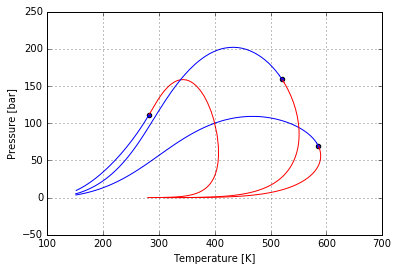

In [26]:
le = flash.liquid_mixture.get_envelope(setup)
ve = flash.vapour_mixture.get_envelope(setup)

final_fig = envelope.plot(ve.plot(le.plot()))